In [1]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import matplotlib.colors
from sklearn.cluster import spectral_clustering
from sklearn.metrics import euclidean_distances

In [2]:
def expand(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

0.01
0.0251188643151
0.063095734448
0.158489319246
0.398107170553
1.0


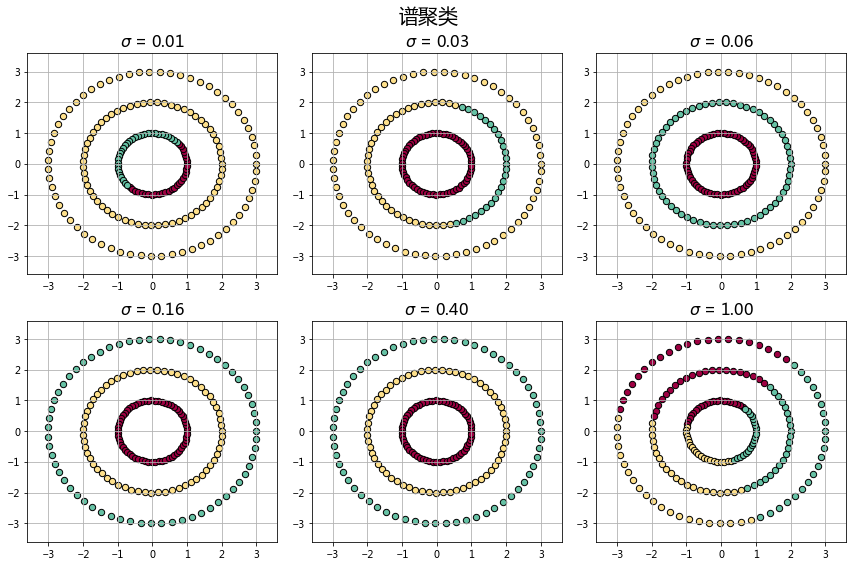

In [3]:
if __name__ == "__main__":
    # matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
    # matplotlib.rcParams['axes.unicode_minus'] = False

    t = np.arange(0, 2*np.pi, 0.1)
    data1 = np.vstack((np.cos(t), np.sin(t))).T
    data2 = np.vstack((2*np.cos(t), 2*np.sin(t))).T
    data3 = np.vstack((3*np.cos(t), 3*np.sin(t))).T
    data = np.vstack((data1, data2, data3))

    n_clusters = 3
    m = euclidean_distances(data, squared=True)
    sigma = np.median(m)

    plt.figure(figsize=(12, 8), facecolor='w')
    plt.suptitle(u'谱聚类', fontsize=20)
    clrs = plt.cm.Spectral(np.linspace(0, 0.8, n_clusters))
    for i, s in enumerate(np.logspace(-2, 0, 6)):
        print s
        af = np.exp(-m ** 2 / (s ** 2)) + 1e-6
        y_hat = spectral_clustering(af, n_clusters=n_clusters, assign_labels='kmeans', random_state=1)
        plt.subplot(2, 3, i+1)
        for k, clr in enumerate(clrs):
            cur = (y_hat == k)
            plt.scatter(data[cur, 0], data[cur, 1], s=40, c=clr, edgecolors='k')
        x1_min, x2_min = np.min(data, axis=0)
        x1_max, x2_max = np.max(data, axis=0)
        x1_min, x1_max = expand(x1_min, x1_max)
        x2_min, x2_max = expand(x2_min, x2_max)
        plt.xlim((x1_min, x1_max))
        plt.ylim((x2_min, x2_max))
        plt.grid(True)
        plt.title(ur'$\sigma$ = %.2f' % s, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()